**Step Pengolahan Data**


1.   EDA
2.   Pre-Processing
3.   Modelling
4.   ...........,etc



In [ ]:
# import library
import pandas as pd
import numpy as np

#import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import ML Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler

#import ML Model
#LinearRegression
#RidgeRegression

# Load Dataset

In [ ]:
data = pd.read_csv('Dataset2_House_Price.csv')
data.head(10)

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
0,2005,75523,3,0,7,7559081.5
1,2015,80771,39,1,2,8085989.5
2,2021,55712,58,1,9,5574642.1
3,2012,32316,47,0,3,3232561.2
4,1990,70429,19,1,4,7055052.0
5,2012,39223,36,0,1,3926647.2
6,1995,58682,10,0,5,5876376.5
7,2003,86929,100,0,10,8696869.3
8,2012,51522,3,1,5,5154055.2
9,2021,39686,42,1,3,3970892.1


In [ ]:
data.dtypes

made                int64
squareMeters        int64
numberOfRooms       int64
hasStorageRoom      int64
hasGuestRoom        int64
price             float64
dtype: object

In [ ]:
data.shape

(10000, 6)

In [ ]:
data.isna().sum()

made              0
squareMeters      0
numberOfRooms     0
hasStorageRoom    0
hasGuestRoom      0
price             0
dtype: int64

In [ ]:
#Cek data duplicate
dd = data[data.duplicated()]
print("Number of Duplicate : ", dd.shape)

Number of Duplicate :  (0, 6)


# EDA

In [ ]:
data.describe()

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,1.000000e+04
mean,2005.48850,49870.13120,50.358400,0.503000,4.99460,4.993448e+06
std,9.30809,28774.37535,28.816696,0.500016,3.17641,2.877424e+06
min,1990.00000,89.00000,1.000000,0.000000,0.00000,1.031350e+04
25%,1997.00000,25098.50000,25.000000,0.000000,2.00000,2.516402e+06
50%,2005.50000,50105.50000,50.000000,1.000000,5.00000,5.016180e+06
75%,2014.00000,74609.75000,75.000000,1.000000,8.00000,7.469092e+06
max,2021.00000,99999.00000,100.000000,1.000000,10.00000,1.000677e+07


<ipython-input-10-98bb04fe1195>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['price'], kde=True, color='c')


Text(0.5, 1.0, 'Distribusi Harga Rumah')

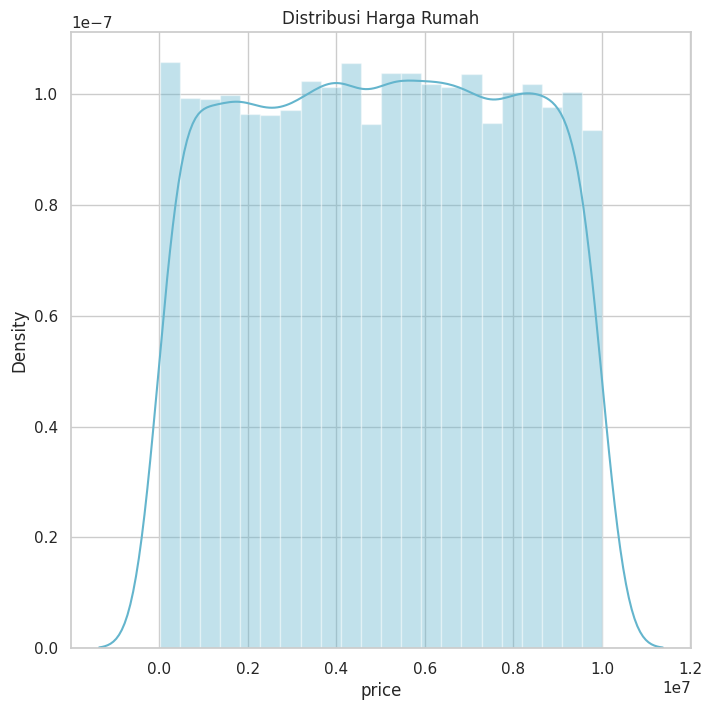

In [ ]:
sns.set(style="whitegrid")
f, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.distplot(data['price'], kde=True, color='c')
plt.title("Distribusi Harga Rumah")

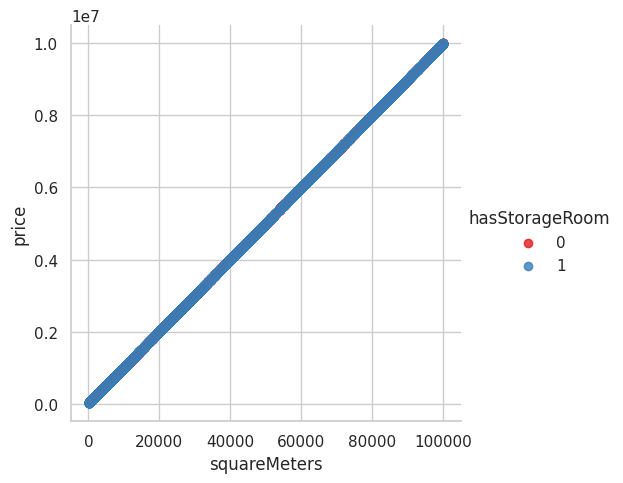

In [ ]:
ax = sns.lmplot(x="squareMeters", y="price", hue="hasStorageRoom", palette="Set1", data=data)

hasil insight diatas menunjukkan bahwa hubungan yang kuat antara squaremeters dengan price, yang menunjukkan bahwa semakin luas squaremeters berarti semakin mahal harganya

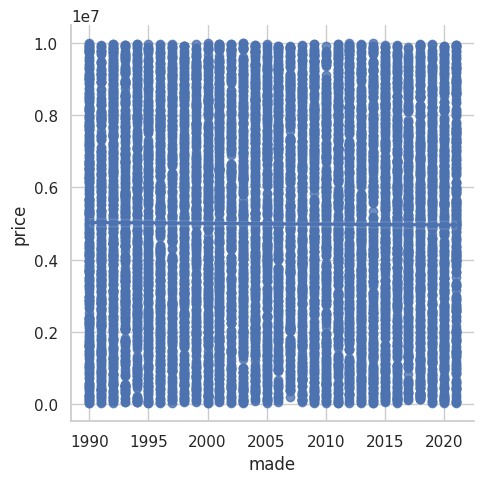

In [ ]:
ax = sns.lmplot(x="made", y="price", data=data, palette="Set1")

Visualisasi diatas menunjukkan bahwa tidak ada hubungan yang signifikan antara made dan price.

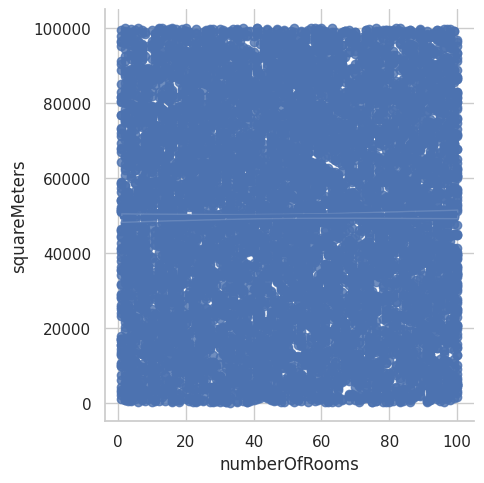

In [ ]:
ax = sns.lmplot(x="numberOfRooms", y="squareMeters", data=data, palette="Set1")

Visualisasi diatas tidak menunjukkan hubungan yang signifikan antara numberOfRooms dan squareMeters

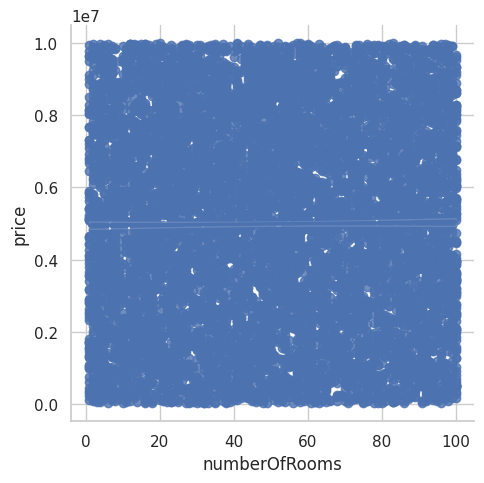

In [ ]:
ax = sns.lmplot(x="numberOfRooms", y="price", data=data, palette="Set1")

Visualisasi diatas menunjukkan bahwa tidak adanya hubungan yang signifikan antara price dan numberOfRooms.

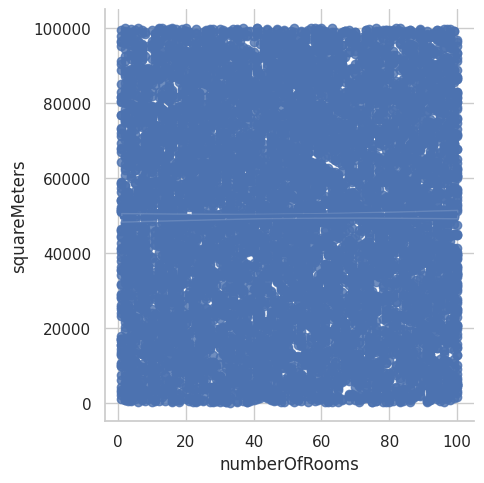

In [ ]:
ax = sns.lmplot(x="numberOfRooms", y="squareMeters", data=data, palette="Set1")

Visualisasi diatas menunjukkan bahwa tidak adanya hubungan yang signifikan antara squareMeters dan numberOfRoom.

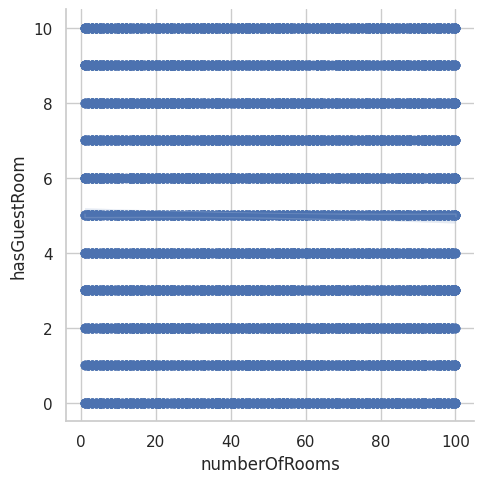

In [ ]:
ax = sns.lmplot(x="numberOfRooms", y="hasGuestRoom", data=data, palette="Set1")

Visualisasi diatas menunjukkan bahwa adanya hubungan antara numberOfRoom dan hasGuestRoom. Dengan kata lain, tiap total ruangan dalam rumah mempunyai ruang tamu dengan berbagai jumlahnya.

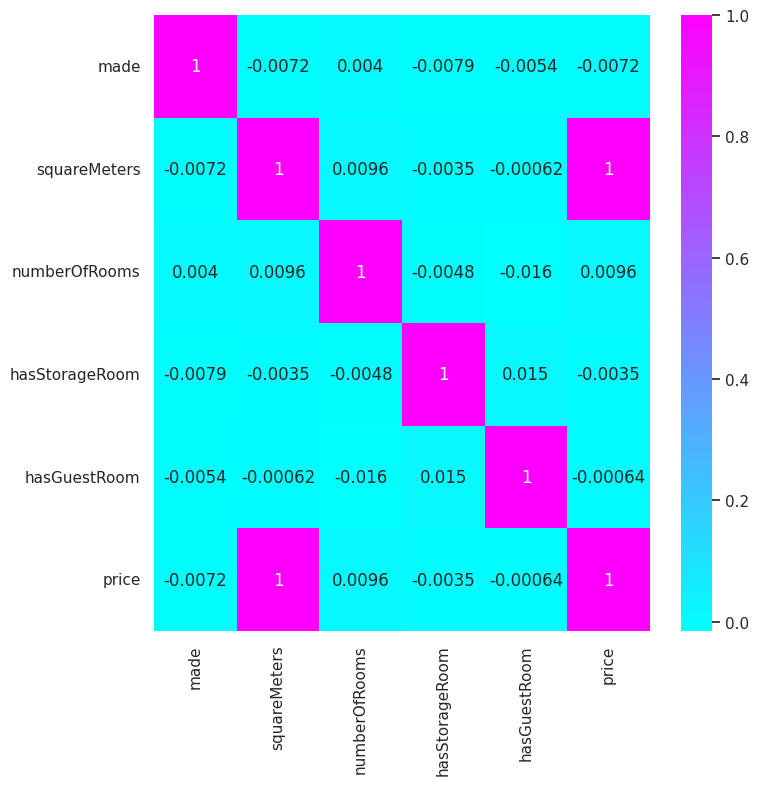

In [ ]:
f, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.heatmap(data.corr(), annot=True, cmap="cool")

# Data Pre-processing

In [ ]:
# copy data
dfc = data.copy()

# Scaling Data
scaler = StandardScaler()

scaled_data = scaler.fit_transform(dfc)

stdr_data = pd.DataFrame(scaled_data, columns=dfc.columns)

print("Dataframe Setelah Scaling:")
print(stdr_data)

Dataframe Setelah Scaling:
          made  squareMeters  numberOfRooms  hasStorageRoom  hasGuestRoom  \
0    -0.052484      0.891562      -1.643518       -1.006018      0.631373   
1     1.021904      1.073956      -0.394180        0.994018     -0.942810   
2     1.666537      0.203033       0.265193        0.994018      1.261046   
3     0.699588     -0.610092      -0.116549       -1.006018     -0.627973   
4    -1.664066      0.714521      -1.088257        0.994018     -0.313136   
...        ...           ...            ...             ...           ...   
9995  0.377271     -1.673244       1.341012       -1.006018     -0.313136   
9996 -1.664066     -0.190009      -0.741218       -1.006018     -1.572483   
9997 -0.052484      1.180654      -1.643518        0.994018      1.261046   
9998  0.484710      0.318559       0.681639        0.994018     -0.313136   
9999 -1.234311     -1.683183       1.167493        0.994018      0.316537   

         price  
0     0.891687  
1     1.074814

In [ ]:
#MinMaxScaling
dfc = data.copy()
scaled2 = MinMaxScaler()
scaled_data = scaled2.fit_transform(dfc)
stdr_data = pd.DataFrame(scaled_data, columns=dfc.columns)

print("Dataframe Setelah Scaling:")
print(stdr_data)

Dataframe Setelah Scaling:
          made  squareMeters  numberOfRooms  hasStorageRoom  hasGuestRoom  \
0     0.483871      0.755020       0.020202             0.0           0.7   
1     0.806452      0.807547       0.383838             1.0           0.2   
2     1.000000      0.556731       0.575758             1.0           0.9   
3     0.709677      0.322560       0.464646             0.0           0.3   
4     0.000000      0.704034       0.181818             1.0           0.4   
...        ...           ...            ...             ...           ...   
9995  0.612903      0.016385       0.888889             0.0           0.4   
9996  0.000000      0.443539       0.282828             0.0           0.0   
9997  0.483871      0.838274       0.020202             1.0           0.9   
9998  0.645161      0.590001       0.696970             1.0           0.4   
9999  0.129032      0.013522       0.838384             1.0           0.6   

         price  
0     0.755144  
1     0.807854

In [ ]:
dfc = data.copy()
scaled3 = RobustScaler()
scaled_data = scaled3.fit_transform(dfc)
stdr_data = pd.DataFrame(scaled_data, columns=dfc.columns)

print("Dataframe Setelah Scaling:")
print(stdr_data)

Dataframe Setelah Scaling:
          made  squareMeters  numberOfRooms  hasStorageRoom  hasGuestRoom  \
0    -0.029412      0.513368          -0.94            -1.0      0.333333   
1     0.558824      0.619364          -0.22             0.0     -0.500000   
2     0.911765      0.113237           0.16             0.0      0.666667   
3     0.382353     -0.359302          -0.06            -1.0     -0.333333   
4    -0.911765      0.410482          -0.62             0.0     -0.166667   
...        ...           ...            ...             ...           ...   
9995  0.205882     -0.977142           0.78            -1.0     -0.166667   
9996 -0.911765     -0.115176          -0.42            -1.0     -0.833333   
9997 -0.029412      0.681370          -0.94             0.0      0.666667   
9998  0.264706      0.180373           0.40             0.0     -0.166667   
9999 -0.676471     -0.982918           0.68             0.0      0.166667   

         price  
0     0.513438  
1     0.619827

In [ ]:
#Train Split Test
x = stdr_data.drop(['price'], axis=1) #Prediktor
y = stdr_data['price'] #Label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Modelling

## Training and Testing Model
Komparasi antara training dan testing score

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_train_pred = Lin_reg.predict(x_train)
y_test_pred = Lin_reg.predict(x_test)

print("Score:", Lin_reg.score(x_train, y_train))
print("Score:", Lin_reg.score(x_test, y_test))

#RandomForestRegressor
#Lasso and Ridge
#XGBoostRegressor
#KNNRegressor

Score: 0.9999986933005185
Score: 0.9999987921640247


In [ ]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)

print("Score:", ridge_model.score(x_train, y_train))
print("Score:", ridge_model.score(x_test, y_test))

Score: 0.9999986771961296
Score: 0.9999987734963749


In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
y_train_pred = rf_reg.predict(x_train)
y_test_pred = rf_reg.predict(x_test)

print("Score:", ridge_model.score(x_train, y_train))
print("Score:", ridge_model.score(x_test, y_test))

Score: 0.9999986771961296
Score: 0.9999987734963749


In [ ]:
xgboost_reg = xgb.XGBRegressor()
xgboost_reg.fit(x_train, y_train)
y_train_pred = xgboost_reg.predict(x_train)
y_test_pred = xgboost_reg.predict(x_test)

print("Score:", xgboost_reg.score(x_train, y_train))
print("Score:", xgboost_reg.score(x_test, y_test))

Score: 0.999989118708688
Score: 0.9999791389856902


In [ ]:
KNN_reg = KNeighborsRegressor()
KNN_reg.fit(x_train, y_train)
y_train_pred = KNN_reg.predict(x_train)
y_test_pred = KNN_reg.predict(x_test)

print("Score:", KNN_reg.score(x_train, y_train))
print("Score:", KNN_reg.score(x_test, y_test))

Score: 0.9935366018988732
Score: 0.9909655674485524


# Model Tuning

In [ ]:
#Model Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100], 'solver':['auto', 'svd', 'saga', 'cholesky', 'lsqr']}

grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring= "neg_mean_squared_error")
grid_search.fit(x_train, y_train)

print("Parameter Terbaik:", grid_search.best_params_)

#Prediksi
y_pred = grid_search.predict(x_test)

print("R2_score:", r2_score(y_test, y_pred))

Parameter Terbaik: {'alpha': 0.1, 'solver': 'lsqr'}
R2_score: 0.9999987917512302


In [ ]:
ridge_model = Ridge(alpha=10, solver='lsqr')
ridge_model.fit(x_train, y_train)
print("Score:", ridge_model.score(x_test, y_test))

Score: 0.9999971552500594


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(xgboost_reg, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Parameter Terbaik:", grid_search.best_params_)

#Prediksi
y_pred = grid_search.predict(x_test)

print("R2_score:", r2_score(y_test, y_pred))

Parameter Terbaik: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
R2_score: 0.9999823008938422


In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}

grid_search = GridSearchCV(KNN_reg, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Parameter Terbaik:", grid_search.best_params_)

#Prediksi
y_pred = grid_search.predict(x_test)

print("R2_score:", r2_score(y_test, y_pred))

Parameter Terbaik: {'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
R2_score: 0.9920373298098842


In [ ]:
xgboost_reg = xgb.XGBRegressor(colsample_bytree=1.0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8)
xgboost_reg.fit(x_train, y_train)
print("Score:", xgboost_reg.score(x_test, y_test))

Score: 0.9999823008938422


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf_reg.fit(x_train, y_train)
print("Score:", rf_reg.score(x_test, y_test))

Score: 0.9999907609658267


In [ ]:
KNN_reg = KNeighborsRegressor(n_neighbors=9, weights='distance', algorithm='brute', leaf_size=20, p=2)
KNN_reg.fit(x_train, y_train)
print("Score:", KNN_reg.score(x_test, y_test))

Score: 0.9920373298098842


In [ ]:
import pickle
pickle.dump(ridge_model, open('Ridge_model.pkl', 'wb'))

### Berdasarkan hasil di atas, kita akan mengambil model:
1. Ridge
2. RandomForest Regressor
3. .........
4. .........

Karena Ridge Model dan RandomForest Regressor mempunyai skor parameter yang lebih tinggi dibanding parameter lainnya. Ridge model memiliki skor 0.9999971552500594 setelah tuning model. sedangkan RandomForest Regressor memiliki skor 0.9999907609658267.

In [ ]:
# Model Improvement and Tunning

In [ ]:
pip install pyngrok

In [ ]:
pip install flask

# Kesimpulan

Dari data diatas dapat disimpulkan bahwa:


1.   Data tersebut kurang bagus, karena data data tersebut bersifat agak rancu pada nilai tengahnya dan lainnya.
2.   Model yang paling tepat adalah Ridge Model. Karena jika memakai RandomForest Regressor harus di evaluasi dan di uji lebih lanjut agar tidak terjadi model yang overfitting. Dengan Skor RandomForestRegressor yang sebesar 0.9999971552500594 menunjukkan bahwa performa model yang tinggi saat pelatihan dan hampir mampu menjelaskan seluruh variasi yang ada dalam data pelatihan.
3.   Untuk perbaikan maka data ini harus dilakukan evaluasi dan duji lebih lanjut agar mendapatkan model yang tepat dan sesuai dan tidak terjadi overfitting. Dengan kata lain, saya akan menggunakan Ridge Model sebagai modellingnya agar tidak terhindar dari overfitting ataupun underfitting





(Optional) Bisa menambahkan Model Deployment 1 dengan Flask untuk extra score.

In [ ]:
from flask import Flask
from flask import jsonify, request
from pyngrok import ngrok
from datetime import datetime
import pickle

app = Flask(__name__)

with open ('Ridge_model.pkl', 'rb') as file:
  model = pickle.load(file)

## Route menggunakan GET
@app.route('/', methods=['GET'])
def index():
  return jsonify({"Nama":"Andika", "Status":"Sukses"})


@app.route('/predict', methods=['POST'])
def predict():
  data = request.get_json()

  made = data["made"]
  squareMeters = data["squareMeters"]
  numberOfRooms = data["numberOfRooms"]
  hasStorageRoom = data["hasStorageRoom"]
  hasGuestRoom = data["hasGuestRoom"]
  price = data["price"]

  prediction = model.predict([[made, squareMeters, numberOfRooms, hasStorageRoom, hasGuestRoom, price]])
  data['Prediction'] = prediction[0]

  return jsonify({"Status":"Sukses", "Prediction": str(prediction[0])})

if __name__ == '__main__':
  ngrok.set_auth_token("2iNGLP8Dk9Kl4AavaD2P08sLoFJ_3KBcZEVxMqigkBagPjaq4")
  ngrok_tunnel = ngrok.connect(5000)
  print("Public_URL:", ngrok_tunnel.public_url)
  app.run()



Public_URL: https://ddc1-34-83-169-113.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
